**Author**

Marco Acea

**Email**

macea@andrew.cmu.edu

**Brief Introduction**

Signal processing library for Talking Piano Project

In [312]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
from scipy.io import wavfile

# from scipy.io.wavfile import read as wav_to_numpy
from IPython import display

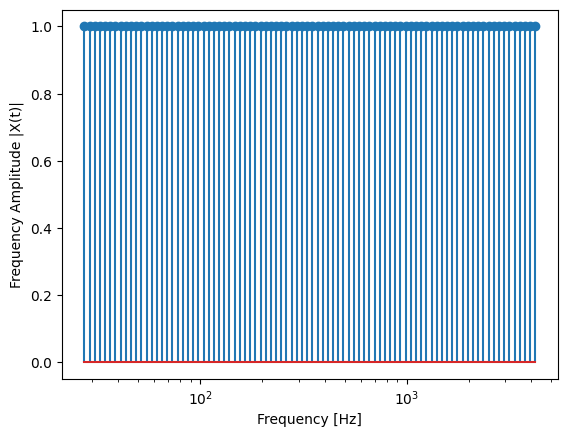

In [313]:
if 'key_frequencies.txt' not in os.listdir():
  with open('key_frequencies.txt', 'w') as f:
    for n in range(1,89):
      freq = (2**((n-49)/12))*440
      if (n != 88):
        text = "{:.3f}\n".format(freq)
      else:
        text = "{:.3f}".format(freq)
      if text != '': f.write(text)
    f.close()

with open('key_frequencies.txt', 'r') as f:
    PIANO_KEY_FREQUENCIES = []
    for n in f.read().split('\n'):
      PIANO_KEY_FREQUENCIES.append(float(n))
    
    fig, ax = plt.subplots()
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Frequency Amplitude |X(t)|') # TODO: Figure out what our units should be
    ax.set_xscale('log')
    ax.stem(PIANO_KEY_FREQUENCIES, np.ones(len(PIANO_KEY_FREQUENCIES)))
f.close()

Now let's try plotting the frequency data of a sample recording. Check out the
recording below.

In [314]:
# Play the audio file
audio_path = "assets/marco_speech_18_500.wav"
display.Audio(audio_path)

Recorded with a sample rate of 48000


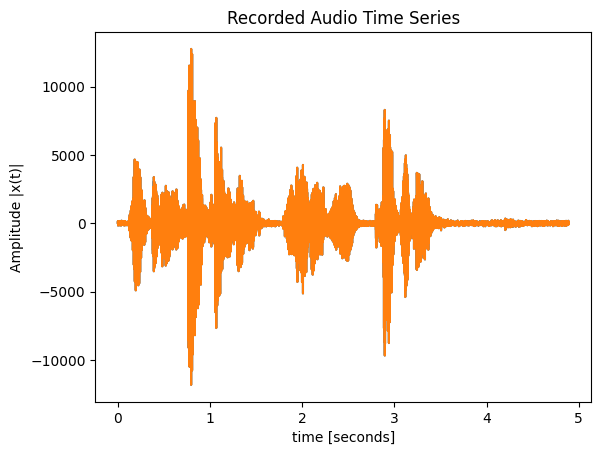

In [315]:
sample_rate, audio_time_series = wavfile.read(audio_path)
print("Recorded with a sample rate of", sample_rate)
time = np.linspace(0, len(audio_time_series) / sample_rate, num=len(audio_time_series))
plt.plot(time, audio_time_series)
plt.title('Recorded Audio Time Series')
plt.xlabel("time [seconds]")
plt.ylabel("Amplitude |x(t)|")
plt.show()


We're interested in seeing what frequencies make up our voice. Let's see what
frequencies were used within the first **1 second**

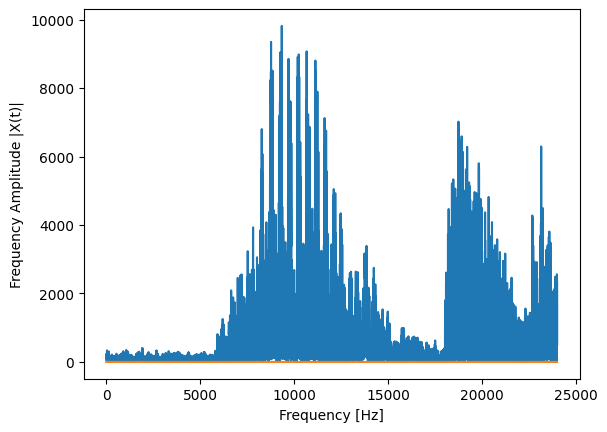

In [316]:
single_sample_data = audio_time_series[:sample_rate]

def fft_plot(audio, sample_rate):
  N = len(audio)    # Number of samples
  y_freq = fft(audio)
  domain = len(y_freq) // 2
  x_freq = np.linspace(0, sample_rate//2, N//2)
  plt.plot(x_freq, abs(y_freq[:domain]))
  plt.xlabel("Frequency [Hz]")
  plt.ylabel("Frequency Amplitude |X(t)|")
  return plt.show()

fft_plot(single_sample_data, sample_rate)

This checks out with the spectral anaylsis we get from the `audio-preview`
extension for visual studio code.

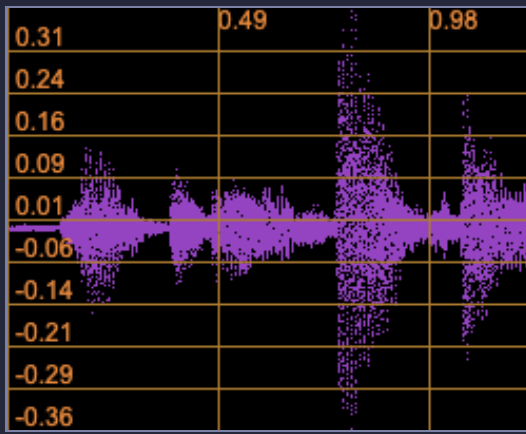

In [317]:
display.Image('assets/single_sample_spectral_analysis.png')

Let's see this on a spectogram.